# Documentation for the 72 month all-sky models

In order to look for transient sources that may fail to be detected on long time scales, and to quantify the variability of all sources, we peformed a full all-sky analysis, including source detection, for the data in each of the 72 months covered by the current 6-year sky model. Thus we have created 72 monthly sky models, using the same code and procedures as for the full-duration sky models used to create 2FGL, 3FGL, and the current 6-year Pass 8 model, uw972.

### Data preparation
Note that all files are at SLAC, under the catalog group area, `/nfs/farm/g/glast/g/catalog/`.
Data for all months as defined by Jean Ballet, are located in the folder `P8_301/Source/`. From these, we created `pointlike` binned photon data files in  `pointlike/fermi/data/P8_P301/binfiles`. Note that this uses the front/back event types. (Note that P301 is essentially identical to P302).

### Processing
Event processing is done individually for each month, using the same IRF and background model as for the full six years. There are four stages, all implemented with a task `UWpipeline` in the Fermi-LAT [Pipeline II](http://glast-ground.slac.stanford.edu/Pipeline-II/exp/Fermi/task.jsp?task=141117377). 
1. Create a model using the 6-year set of source, but with spectral shape parameters and positions fixed. That is, only the normalization is free. Remove those that have TS<10. 

2. Add all seeds from a PGWAVE run on almost the same month. These files exist in the folder `transients/`. This triggers an update interation cycle, which continues until the log likelihod change for all ROIs is less than 10.

3. Run the `tables` stage, which measures, for each of 3.1 M nside=512 positions, the TS of a point source with spectral index 2.2. This is done in parallel for each ROI, the results assempled into one FITS file. Then make a clustering study to extract potential seeds. Since we do not use a specific Sun model, the path of the Sun along the ecliptic is masked out of the search for seeds.  

4. Add the seeds from the TS map cluster analysis. This again triggers an iteration until no ROI's log likelihood changes by more that 10. This generates summary plots.

I will show examples for month16 below. The rest are similar.


## Creation
The first analysis stage for each month was to perform a likelihood optimization, starting with the full set of 6568 TS>10 sources in the 6-year model. Only the normalization was allowed to vary; the for constant sources, the normalization should be the same for the smaller period, but the TS should be a factor of 72 smaller. Sources that satisfy TS>5, for the month are kept for further processing. Surprisingly, 6509, or 99% of these sources are detected in at least one month. The average per month is $1200 \pm 45$. 

## PGWAVE seeds
The PGWAVE analysis is described elsewhere. It was performed for each month's data, creating 72 files of around 1620 potential sources each. The following plot shows the distribution of these sources in the sky for month 16. 

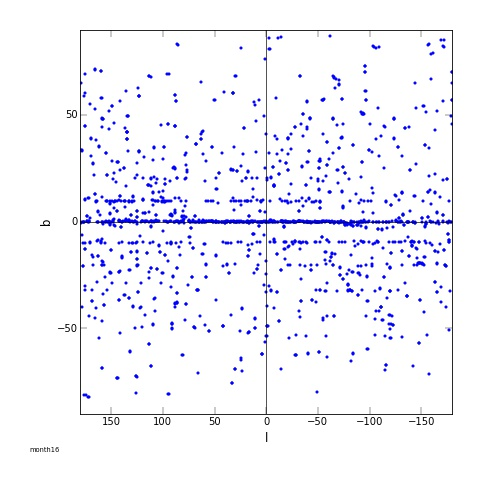

In [1]:
from IPython import display
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))
display.Image('month16/plots/pgwave/seed_skyplot_month16.jpg')

The bands at $b=\pm10$ degrees are presumably artifacts.

We ran the `addseeds_pgw` stage, which attempts to make a power-law source at the position of each seed. Those that succeeded, meaning that TS>10 and location quality less than 8, were added to the model. Then a set of interations was started, ending when the individual likelihoods were stable.
  Here are the locations of the 37 PGWAVE sources that were accepted.

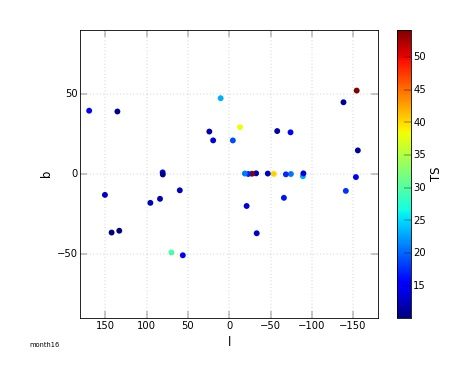

In [2]:
display.Image('month16/plots/pgwave/skyplot_good_month16.jpg')

## TSmap seeds
Next, we ran the `tables` stage, which generated an `nside=512` HEALPIx map of the TS for an attempted point source at each of the 3.1 M positions. This took the current model into account, including all current sources and the galactic and diffuse background. Here is the map for month16.

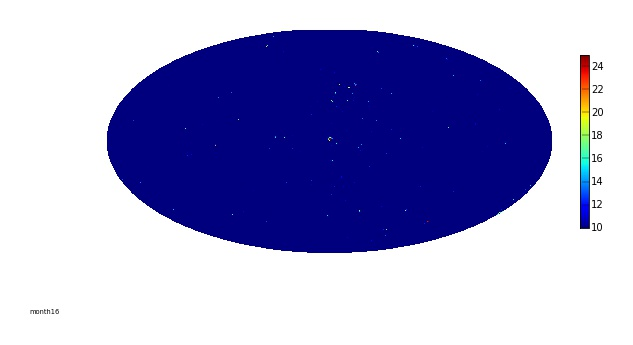

In [3]:
display.Image('month16/plots/hptables_ts/ts_map_month16.jpg')

Then we performed a cluster analysis on the map, but with the Sun's path for the month masked out. All clusters with at least two pixels and maximum TS>10 were kept for a seed check.
These plots show the distributions. The seeds were added to the model with a `addseeds_ts` stage, which is followed by an iteration cycle.

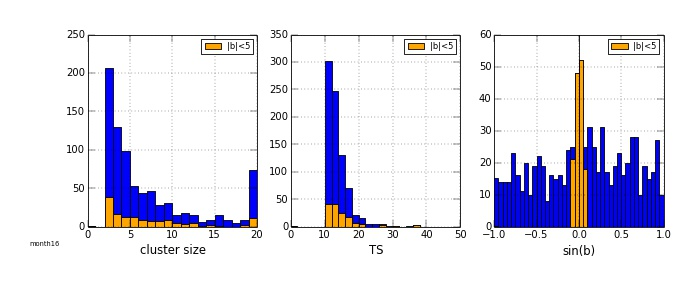

In [4]:
display.Image('month16/plots/hptables_ts/seed_plots_month16.jpg')

## Summary 
The following plot shows the progresion of month 16 through 14 processing stages. Both seed-adding stages make significant increases to the total log likelihood. After each addition, 250 or so ROI's changed by more than 10. Subsequent iterations were performed until a stable solution was found.

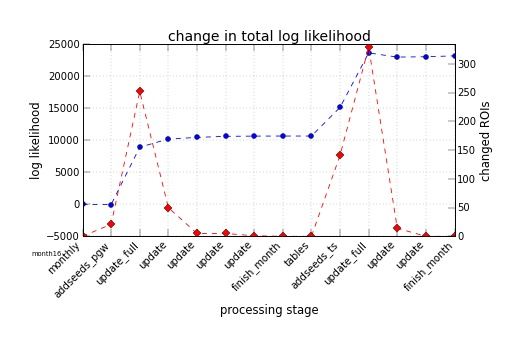

In [5]:
display.Image('month16/plots/counts/loglikelihood_month16.jpg')

This summary plot shows the cumulative TS distribution for the two sets of seeds. The reason that we perform the PGWAVE source detection first is to mitigate a vulnerability of the TS map method, that may fail with strong sources, especially in regions with confused background. And indeed, as the plot shows, no strong sources were detected by the TS map technique.

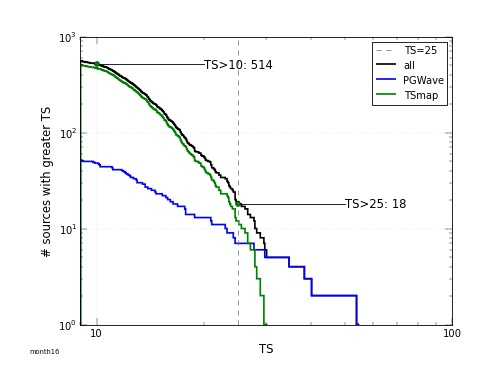

In [6]:
display.Image('month16/plots/transients/cumulative_ts_month16.jpg')